In [1]:
# source: https://stackoverflow.com/questions/40460960/how-to-plot-a-sphere-when-we-are-given-a-central-point-and-a-radius-size
# Source: https://stackoverflow.com/questions/11140163/python-matplotlib-plotting-a-3d-cube-a-sphere-and-a-vector

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import numpy as np
from numpy import linalg as LA
import math
from numpy.linalg import inv



def WireframeSphere(centre=[0.,0.,0.], radius=1.,
                    n_meridians=20, n_circles_latitude=None):

    """
    Create the arrays of values to plot the wireframe of a sphere.

    Parameters
    ----------
    centre: array like
        A point, defined as an iterable of three numerical values.
    radius: number
        The radius of the sphere.
    n_meridians: int
        The number of meridians to display (circles that pass on both poles).
    n_circles_latitude: int
        The number of horizontal circles (akin to the Equator) to display.
        Notice this includes one for each pole, and defaults to 4 or half
        of the *n_meridians* if the latter is larger.

    Returns
    -------
    sphere_x, sphere_y, sphere_z: arrays
        The arrays with the coordinates of the points to make the wireframe.
        Their shape is (n_meridians, n_circles_latitude).

    Examples
    --------
    >>> fig = plt.figure()
    >>> ax = fig.gca(projection='3d')
    >>> ax.set_aspect("equal")
    >>> sphere = ax.plot_wireframe(*WireframeSphere(), color="r", alpha=0.5)
    >>> fig.show()

    >>> fig = plt.figure()
    >>> ax = fig.gca(projection='3d')
    >>> ax.set_aspect("equal")
    >>> frame_xs, frame_ys, frame_zs = WireframeSphere()
    >>> sphere = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="r", alpha=0.5)
    >>> fig.show()
    """
    if n_circles_latitude is None:
        n_circles_latitude = max(n_meridians/2, 4)
    u, v = np.mgrid[0:2*np.pi:n_meridians*1j, 0:np.pi:n_circles_latitude*1j]
    sphere_x = centre[0] + radius * np.cos(u) * np.sin(v)
    sphere_y = centre[1] + radius * np.sin(u) * np.sin(v)
    sphere_z = centre[2] + radius * np.cos(v)
    return sphere_x, sphere_y, sphere_z

def find_d(v1, v2):
    x1 = v1[0]
    x2 = v2[0]
    y1 = v1[1]
    y2 = v2[1]
    z1 = v1[2]
    z2 = v2[2]
    d = np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)
    return d 

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)


def find_R(V1, V2):
    v1_u = unit_vector(V1)
    v2_u = unit_vector(V2)
    V = np.cross(v1_u, v2_u)
    s = LA.norm(np.cross(v1_u, v2_u))
    c = np.dot(v1_u, v2_u)

    I = np.mat([[1,0,0],[0,1,0],[0,0,1]])
    v1 = V[0]
    v2 = V[1]
    v3 = V[2]
    Vx = np.mat([[0,-v3,v2],[v3,0,-v1],[-v2,v1,0]])
    R = I + Vx + (Vx**2)*((1-c)/s**2)
    return R

class Arrow3D(FancyArrowPatch):
    def __init__(self, start=[0,0,0], end=[1,1,1], *args, **kwargs):
        if "arrowstyle" not in kwargs:
            kwargs["arrowstyle"] = "-|>"
        if "mutation_scale" not in kwargs:
            kwargs["mutation_scale"] = 20
        if "color" not in kwargs:
            kwargs["color"] = "k"
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        xs = [start[0], end[0]]
        ys = [start[1], end[1]]
        zs = [start[2], end[2]]
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [22]:
#######

def random_pt_generation(c_sp1, c_sp2, radius_sp1, radius_sp2):
#     fig = plt.figure(figsize=(20,10))
#     ax = fig.gca(projection='3d')
#     ax.set_aspect("equal")


#     #Draw Two Original Shperes
#     frame_xs, frame_ys, frame_zs = WireframeSphere(centre = c_sp1,radius = radius_sp1)
#     sphere1 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="r", alpha=0.5)
#     frame_xs, frame_ys, frame_zs = WireframeSphere(centre = c_sp2,radius = radius_sp2)
#     sphere2 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="r", alpha=0.5)

    #Draw a point in original sphere
    c_pt=np.array([20, 20, 20])
    # ax.scatter(c_pt[0],c_pt[1],c_pt[2])


    #Translate two spheres
    t_sp1 = c_sp1 - c_sp1
    t_sp2 = c_sp2 - c_sp1

#     #Draw Two Translated Shperes
#     frame_xs, frame_ys, frame_zs = WireframeSphere(centre = t_sp1,radius = radius_sp1)
#     sphere3 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="g", alpha=0.5)
#     frame_xs, frame_ys, frame_zs = WireframeSphere(centre = t_sp2,radius = radius_sp2)
#     sphere4 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="g", alpha=0.5)

    #Draw a translated point in original sphere
    t_pt=c_pt - c_sp1
#     print(t_pt)
#     ax.scatter(t_pt[0],t_pt[1],t_pt[2])

    #distance between two spheres
    d = find_d(t_sp1, t_sp2)
    r_sp1 = t_sp1
    r_sp2 = [d,0,0]

    #Find the rotation matrix between two vectors t_sp2 and r_sp2 
#     print("vector 1 is: ", t_sp2)
#     print("vector 2 is: ", r_sp2)

    R = find_R(t_sp2, r_sp2)
#     print("R: ")
#     print(R)


#     print("rotating vector 1 with R is vector 2:")
#     print("vector2 = R*vector1")
#     print(R*np.mat(t_sp2).T)

#     print("vector1 = R-1*vector2")
#     print(inv(R)*np.mat(r_sp2).T)


    r_pt = R*np.mat(t_pt).T
    r_pt = np.array(r_pt.T)[0]
#     ax.scatter(r_pt[0],r_pt[1],r_pt[2])

#     #Draw Two Rotated Shperes
#     frame_xs, frame_ys, frame_zs = WireframeSphere(centre = r_sp1,radius = radius_sp1)
#     sphere5 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="b", alpha=0.5)
#     frame_xs, frame_ys, frame_zs = WireframeSphere(centre = r_sp2,radius = radius_sp2)
#     sphere6 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="b", alpha=0.5)

#     fig.show()
    
        # Find the cube from the new transformed spheres
    # r_sp1
    # r_sp2
    # radius_sp1
    # radius_sp2 

#     fig = plt.figure(figsize=(30,20))
#     ax = fig.gca(projection='3d')
#     ax.set_aspect("equal")


    alpha = np.arccos((radius_sp1**2 + d**2 - radius_sp2**2)/(2*radius_sp1*d))
    theta = np.arccos((radius_sp2**2 + d**2 - radius_sp1**2)/(2*radius_sp2*d))
    h = radius_sp1*np.sin(alpha)
#     print(h)

    x_min = d - radius_sp2
    x_max = radius_sp1
    z_min = -h
    z_max = h 
    y_min = -h
    y_max = h

    center = radius_sp1*np.cos(alpha)
    # print(center)
    # print(radius_sp2*np.cos(theta))
    # print(d)


#     #Draw Two Rotated Shperes
#     frame_xs, frame_ys, frame_zs = WireframeSphere(centre = r_sp1,radius = radius_sp1)
#     sphere5 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="g", alpha=0.5)
#     frame_xs, frame_ys, frame_zs = WireframeSphere(centre = r_sp2,radius = radius_sp2)
#     sphere6 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="b", alpha=0.5)

    test = [x_min,0,0]
#     ax.scatter(test[0],test[1],test[2], color = "r")
    test = [x_max,0,0]
#     ax.scatter(test[0],test[1],test[2],  color = "r")

    test = [center,y_min,0]
#     ax.scatter(test[0],test[1],test[2],  color = "r")
    test = [center,y_max,0]
#     ax.scatter(test[0],test[1],test[2],  color = "r")

    test = [center,0,h]
#     ax.scatter(test[0],test[1],test[2],  color = "r")
    test = [center,0,-h]
#     ax.scatter(test[0],test[1],test[2],  color = "r")

#     print(r_sp2)

#     fig.show()
    
    c1 = plt.Circle((0,0),radius_sp1, color = 'g', fill = False)
    c2 = plt.Circle((r_sp2[0],0),radius_sp2, color = 'b', fill = False)

    while(1):
        while(1):
            x_rd = np.random.uniform(x_min,x_max,1)
            if x_rd > x_min and x_rd < x_max: 
                break;

        while(1):
            y_rd = np.random.uniform(y_min, y_max,1)
            if y_rd> y_min and y_rd< y_max: 
                break;

        while(1):
            z_rd = np.random.uniform(z_min, z_max, 1)
            if z_rd> z_min and z_rd<z_max: 
                break;

        #within sp1 and sp2 
        d1 = find_d(r_sp1,(x_rd,y_rd,z_rd))
        d2 = find_d(r_sp2,(x_rd,y_rd,z_rd))
        if d1 < radius_sp1 and d2 < radius_sp2:
#             print(x_rd)
#             print(y_rd)
#             print(z_rd)
            break;


#     fig = plt.figure(figsize=(10,10))
#     ax=plt.gca()
#     ax.add_patch(c1)
#     ax.add_patch(c2)
#     ax.scatter(x_min,0,color='r')
#     ax.scatter(x_max,0,color='r')
#     ax.scatter(x_rd,z_rd,color='r')
#     ax.scatter(center,y_min,color='r')
#     ax.scatter(center,y_max,color='r')
#     plt.axis('scaled')
#     plt.show()
    
    def rotate(p):
        return np.array(np.mat(inv(R)*np.mat(p).T).T)[0]

    # plot the random point with spheres in 3d 
#     fig = plt.figure(figsize=(30,20))
#     ax = fig.gca(projection='3d')
#     ax.set_aspect("equal")

#     # Draw Two Rotated Shperes
#     frame_xs, frame_ys, frame_zs = WireframeSphere(centre = r_sp1,radius = radius_sp1)
#     sphere5 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="g", alpha=0.5)
#     frame_xs, frame_ys, frame_zs = WireframeSphere(centre = r_sp2,radius = radius_sp2)
#     sphere6 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="g", alpha=0.5)

    test_randompt = [x_rd[0],y_rd[0],z_rd[0]]
#     ax.scatter(test_randompt[0],test_randompt[1],test_randompt[2], color = "r")
    test_rrandompt = rotate(test_randompt)
#     ax.scatter(test_rrandompt[0],test_rrandompt[1],test_rrandompt[2], color = "r")




    #Back-Rotated 
#     print("sphere1")
#     print(r_sp1)
    test = r_sp1
#     ax.scatter(test[0],test[1],test[2], color = "b")
    test = rotate(test)
#     ax.scatter(test[0],test[1],test[2], color = "b")
#     print(rotate(r_sp1))
#     print(t_sp1)

#     print("sphere2")
#     print(r_sp2)
    test = r_sp2
#     ax.scatter(test[0],test[1],test[2], color = "b")
    test = rotate(test)
#     ax.scatter(test[0],test[1],test[2], color = "b")
#     print(rotate(r_sp2))
#     print(t_sp2)
#     print("random point")
#     print(test)
#     print(rotate(test))


    # test_xmin = [x_min,0,0]
    # ax.scatter(test_xmin[0],test_xmin[1],test_xmin[2], color = "b")
    # test_rxmin = rotate(test_xmin)
    # ax.scatter(test_rxmin[0],test_rxmin[1],test_rxmin[2], color = "r")
    # test_xmax = [x_max,0,0]
    # ax.scatter(test_xmax[0],test_xmax[1],test_xmax[2],  color = "b")
    # test_rxmax = rotate(test_xmax)
    # ax.scatter(test_rxmax[0],test_rxmax[1],test_rxmax[2], color = "r")

    # center_pt = [center,0,0]
    # ax.scatter(center_pt[0],center_pt[1],center_pt[2],  color = "b")
    # center_rpt = rotate(center_pt)
    # ax.scatter(center_rpt[0],center_rpt[1],center_rpt[2], color = "r")

    # test_ymin = [center,y_min,0]
    # ax.scatter(test_ymin[0],test_ymin[1],test_ymin[2],  color = "b")
    # ax.add_artist(Arrow3D(start=center_pt, end=test_ymin))
    # test_ymax = [center,y_max,0]
    # ax.scatter(test_ymax[0],test_ymax[1],test_ymax[2],  color = "b")
    # ax.add_artist(Arrow3D(start=center_pt, end=test_ymax))

    # test_rymin = rotate(test_ymin)
    # ax.scatter(test_rymin[0],test_rymin[1],test_rymin[2],  color = "r")
    # ax.add_artist(Arrow3D(start=center_rpt, end=test_rymin))
    # test_rymax = rotate(test_ymax)
    # ax.scatter(test_rymax[0],test_rymax[1],test_rymax[2],  color = "r")
    # ax.add_artist(Arrow3D(start=center_rpt, end=test_rymax))

    # test_zmin = [center,0,z_min]
    # ax.scatter(test_zmin[0],test_zmin[1],test_zmin[2],  color = "b")
    # ax.add_artist(Arrow3D(start=center_pt, end=test_zmin))
    # test_zmax = [center,0,z_max]
    # ax.scatter(test_zmax[0],test_zmax[1],test_zmax[2],  color = "b")
    # ax.add_artist(Arrow3D(start=center_pt, end=test_zmax))

    # test_rzmin = rotate(test_zmin)
    # ax.scatter(test_rzmin[0],test_rzmin[1],test_rzmin[2],  color = "r")
    # ax.add_artist(Arrow3D(start=center_rpt, end=test_rzmin))
    # test_rzmax = rotate(test_zmax)
    # ax.scatter(test_rzmax[0],test_rzmax[1],test_rzmax[2],  color = "r")
    # ax.add_artist(Arrow3D(start=center_rpt, end=test_rzmax))


#     #Draw Two Rotated Shperes
#     frame_xs, frame_ys, frame_zs = WireframeSphere(centre = t_sp1,radius = radius_sp1)
#     sphere3 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="y", alpha=0.5)
#     frame_xs, frame_ys, frame_zs = WireframeSphere(centre = t_sp2,radius = radius_sp2)
#     sphere4 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="y", alpha=0.5)
#     ax.add_artist(Arrow3D(start=r_sp1, end=r_sp2))
#     ax.add_artist(Arrow3D(start=r_sp1, end=t_sp2))


    # #Translate two spheres
    # t_sp1 = c_sp1 - c_sp1
    # t_sp2 = c_sp2 - c_sp1

#     print("translated vector:")
#     print(t_sp1)
#     print(t_sp1 + c_sp1)
#     print(c_sp1)
#     print("translated vector2: ")
#     print(t_sp2)
#     print(t_sp2 + c_sp1)
#     print(c_sp2)

#     #Draw Two original Shperes
#     frame_xs, frame_ys, frame_zs = WireframeSphere(centre = c_sp1,radius = radius_sp1)
#     sphere1 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="b", alpha=0.5)
#     frame_xs, frame_ys, frame_zs = WireframeSphere(centre = c_sp2,radius = radius_sp2)
#     sphere2 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="b", alpha=0.5)

    test_trandompt = test_rrandompt + c_sp1
#     ax.scatter(test_trandompt[0],test_trandompt[1],test_trandompt[2],  color = "r")

#     print("random generate")
#     print(test_trandompt)
#     print(test_trandompt[0])
#     fig.show()
    return test_trandompt[0], test_trandompt[1], test_trandompt[2]

#Two spheres' origin and radius 
c_sp1 = np.array([10,10,10])
radius_sp1 = 40
c_sp2 = np.array([50,20,25])
radius_sp2 = 10 
x, y, z = random_pt_generation(c_sp1, c_sp2, radius_sp1, radius_sp2)

[10 10 10]
vector 1 is:  [40 10 15]
vector 2 is:  [43.87482193696061, 0, 0]
R: 
[[ 0.91168461  0.22792115  0.34188173]
 [-0.22792115  0.97282603 -0.04076095]
 [-0.34188173 -0.04076095  0.93885858]]
rotating vector 1 with R is vector 2:
vector2 = R*vector1
[[ 4.38748219e+01]
 [-2.08166817e-17]
 [ 1.22124533e-15]]
vector1 = R-1*vector2
[[40.]
 [10.]
 [15.]]
8.748840368426414
[43.87482193696061, 0, 0]
[39.09387091]
[3.34766894]
[5.45363766]


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


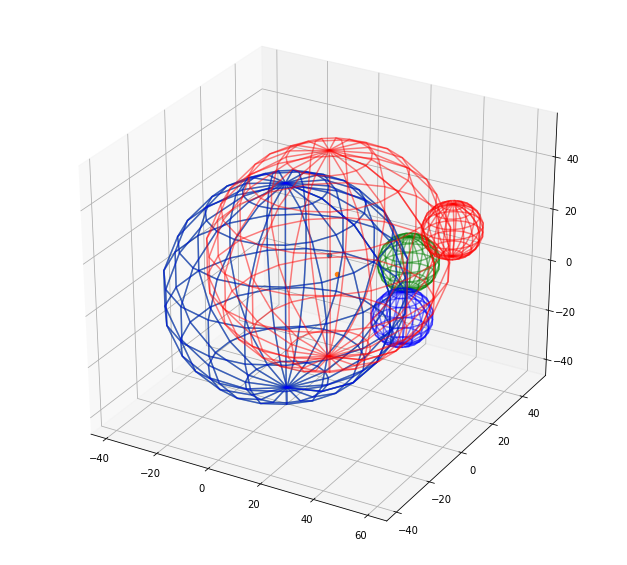

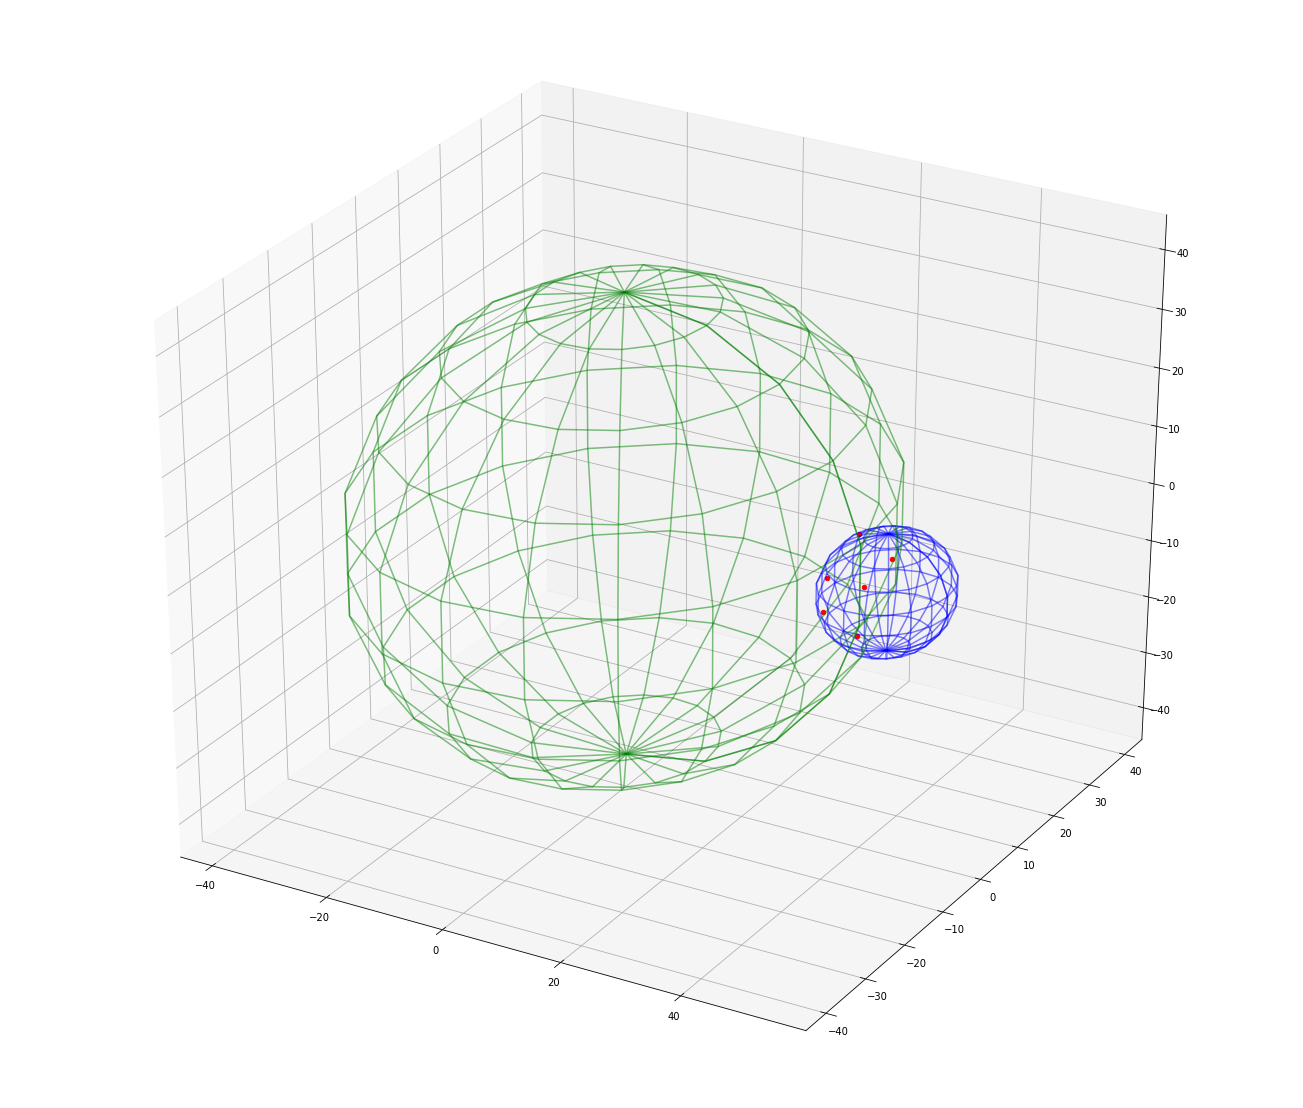

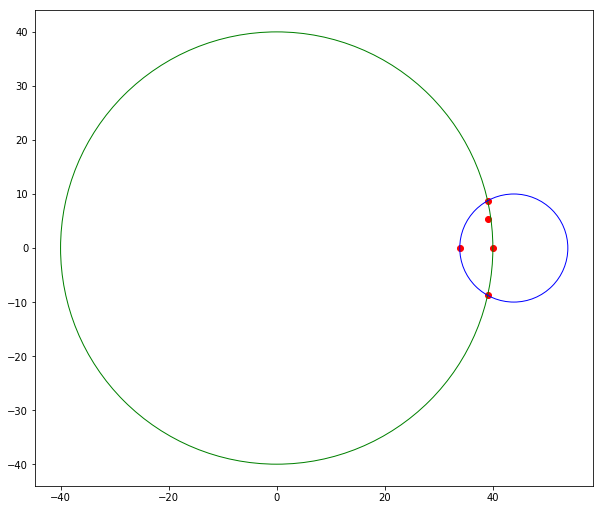

sphere1
[0 0 0]
[0. 0. 0.]
[0 0 0]
sphere2
[43.87482193696061, 0, 0]
[40. 10. 15.]
[40 10 15]
random point
[40. 10. 15.]
[29.059947   18.23369223 27.35053835]
translated vector:
[0 0 0]
[10 10 10]
[10 10 10]
translated vector2: 
[40 10 15]
[50 20 25]
[50 20 25]
random generate
[43.01377688 21.94472419 28.34922053]
43.0137768760788


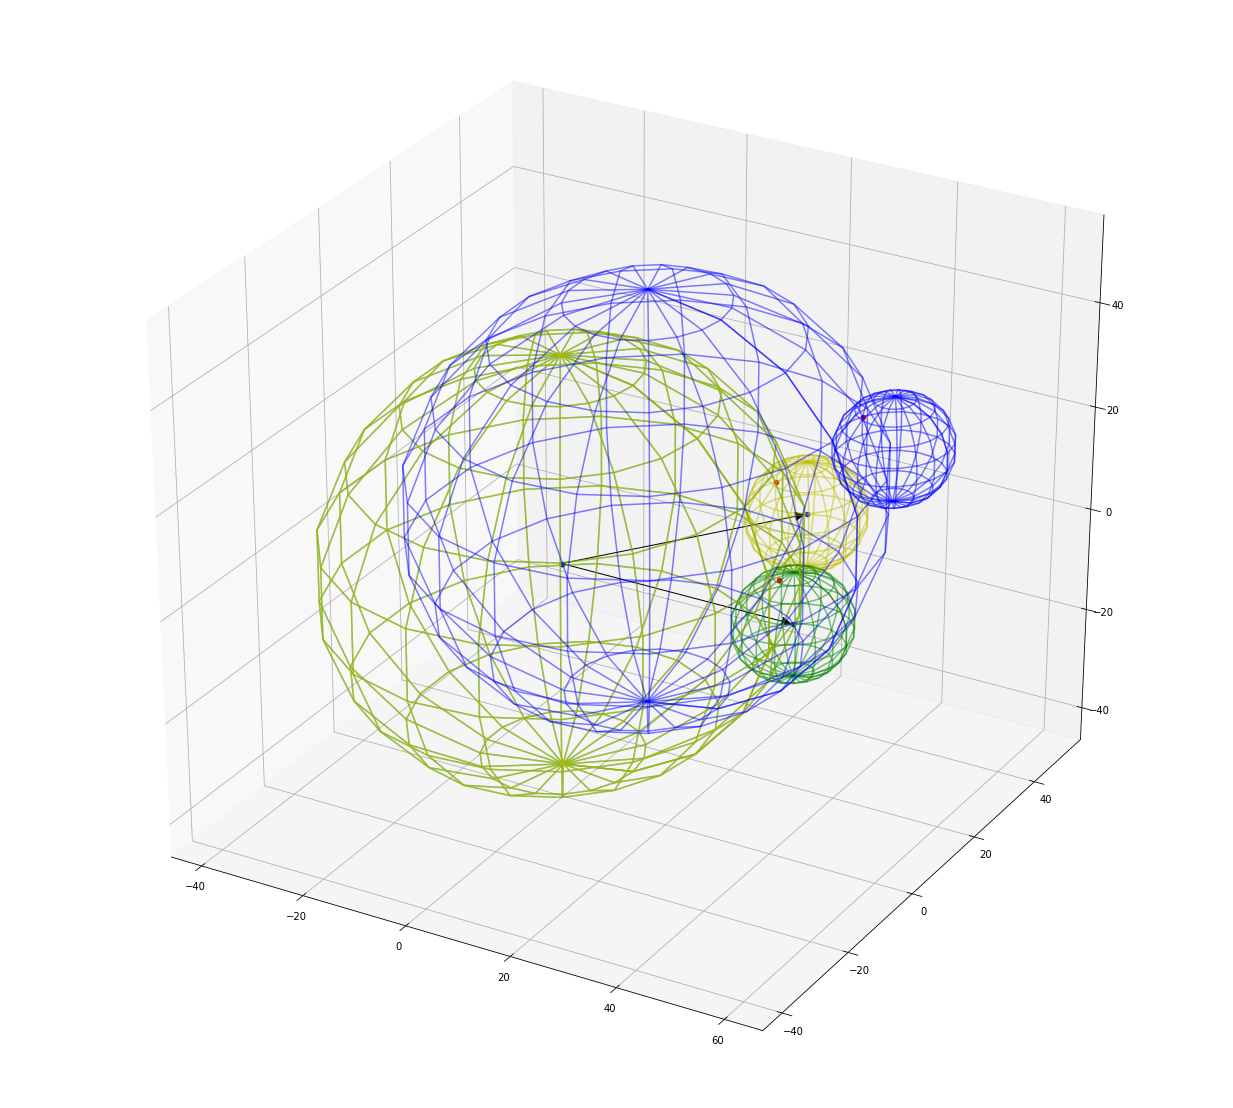

In [23]:
#######

def random_pt_generation_with_plot(c_sp1, c_sp2, radius_sp1, radius_sp2):
    fig = plt.figure(figsize=(20,10))
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")


    #Draw Two Original Shperes
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = c_sp1,radius = radius_sp1)
    sphere1 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="r", alpha=0.5)
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = c_sp2,radius = radius_sp2)
    sphere2 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="r", alpha=0.5)

    #Draw a point in original sphere
    c_pt=np.array([20, 20, 20])
    # ax.scatter(c_pt[0],c_pt[1],c_pt[2])


    #Translate two spheres
    t_sp1 = c_sp1 - c_sp1
    t_sp2 = c_sp2 - c_sp1

    #Draw Two Translated Shperes
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = t_sp1,radius = radius_sp1)
    sphere3 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="g", alpha=0.5)
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = t_sp2,radius = radius_sp2)
    sphere4 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="g", alpha=0.5)

    #Draw a translated point in original sphere
    t_pt=c_pt - c_sp1
    print(t_pt)
    ax.scatter(t_pt[0],t_pt[1],t_pt[2])

    #distance between two spheres
    d = find_d(t_sp1, t_sp2)
    r_sp1 = t_sp1
    r_sp2 = [d,0,0]

    #Find the rotation matrix between two vectors t_sp2 and r_sp2 
    print("vector 1 is: ", t_sp2)
    print("vector 2 is: ", r_sp2)

    R = find_R(t_sp2, r_sp2)
    print("R: ")
    print(R)


    print("rotating vector 1 with R is vector 2:")
    print("vector2 = R*vector1")
    print(R*np.mat(t_sp2).T)

    print("vector1 = R-1*vector2")
    print(inv(R)*np.mat(r_sp2).T)


    r_pt = R*np.mat(t_pt).T
    r_pt = np.array(r_pt.T)[0]
    ax.scatter(r_pt[0],r_pt[1],r_pt[2])

    #Draw Two Rotated Shperes
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = r_sp1,radius = radius_sp1)
    sphere5 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="b", alpha=0.5)
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = r_sp2,radius = radius_sp2)
    sphere6 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="b", alpha=0.5)

    fig.show()
    
        # Find the cube from the new transformed spheres
    # r_sp1
    # r_sp2
    # radius_sp1
    # radius_sp2 

    fig = plt.figure(figsize=(30,20))
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")


    alpha = np.arccos((radius_sp1**2 + d**2 - radius_sp2**2)/(2*radius_sp1*d))
    theta = np.arccos((radius_sp2**2 + d**2 - radius_sp1**2)/(2*radius_sp2*d))
    h = radius_sp1*np.sin(alpha)
    print(h)

    x_min = d - radius_sp2
    x_max = radius_sp1
    z_min = -h
    z_max = h 
    y_min = -h
    y_max = h

    center = radius_sp1*np.cos(alpha)
    # print(center)
    # print(radius_sp2*np.cos(theta))
    # print(d)


    #Draw Two Rotated Shperes
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = r_sp1,radius = radius_sp1)
    sphere5 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="g", alpha=0.5)
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = r_sp2,radius = radius_sp2)
    sphere6 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="b", alpha=0.5)

    test = [x_min,0,0]
    ax.scatter(test[0],test[1],test[2], color = "r")
    test = [x_max,0,0]
    ax.scatter(test[0],test[1],test[2],  color = "r")

    test = [center,y_min,0]
    ax.scatter(test[0],test[1],test[2],  color = "r")
    test = [center,y_max,0]
    ax.scatter(test[0],test[1],test[2],  color = "r")

    test = [center,0,h]
    ax.scatter(test[0],test[1],test[2],  color = "r")
    test = [center,0,-h]
    ax.scatter(test[0],test[1],test[2],  color = "r")

    print(r_sp2)

    fig.show()
    
    c1 = plt.Circle((0,0),radius_sp1, color = 'g', fill = False)
    c2 = plt.Circle((r_sp2[0],0),radius_sp2, color = 'b', fill = False)

    while(1):
        while(1):
            x_rd = np.random.uniform(x_min,x_max,1)
            if x_rd > x_min and x_rd < x_max: 
                break;

        while(1):
            y_rd = np.random.uniform(y_min, y_max,1)
            if y_rd> y_min and y_rd< y_max: 
                break;

        while(1):
            z_rd = np.random.uniform(z_min, z_max, 1)
            if z_rd> z_min and z_rd<z_max: 
                break;

        #within sp1 and sp2 
        d1 = find_d(r_sp1,(x_rd,y_rd,z_rd))
        d2 = find_d(r_sp2,(x_rd,y_rd,z_rd))
        if d1 < radius_sp1 and d2 < radius_sp2:
            print(x_rd)
            print(y_rd)
            print(z_rd)
            break;


    fig = plt.figure(figsize=(10,10))
    ax=plt.gca()
    ax.add_patch(c1)
    ax.add_patch(c2)
    ax.scatter(x_min,0,color='r')
    ax.scatter(x_max,0,color='r')
    ax.scatter(x_rd,z_rd,color='r')
    ax.scatter(center,y_min,color='r')
    ax.scatter(center,y_max,color='r')
    plt.axis('scaled')
    plt.show()
    
    def rotate(p):
        return np.array(np.mat(inv(R)*np.mat(p).T).T)[0]

    # plot the random point with spheres in 3d 
    fig = plt.figure(figsize=(30,20))
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")

    # Draw Two Rotated Shperes
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = r_sp1,radius = radius_sp1)
    sphere5 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="g", alpha=0.5)
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = r_sp2,radius = radius_sp2)
    sphere6 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="g", alpha=0.5)

    test_randompt = [x_rd[0],y_rd[0],z_rd[0]]
    ax.scatter(test_randompt[0],test_randompt[1],test_randompt[2], color = "r")
    test_rrandompt = rotate(test_randompt)
    ax.scatter(test_rrandompt[0],test_rrandompt[1],test_rrandompt[2], color = "r")




    #Back-Rotated 
    print("sphere1")
    print(r_sp1)
    test = r_sp1
    ax.scatter(test[0],test[1],test[2], color = "b")
    test = rotate(test)
    ax.scatter(test[0],test[1],test[2], color = "b")
    print(rotate(r_sp1))
    print(t_sp1)

    print("sphere2")
    print(r_sp2)
    test = r_sp2
    ax.scatter(test[0],test[1],test[2], color = "b")
    test = rotate(test)
    ax.scatter(test[0],test[1],test[2], color = "b")
    print(rotate(r_sp2))
    print(t_sp2)
    print("random point")
    print(test)
    print(rotate(test))


    # test_xmin = [x_min,0,0]
    # ax.scatter(test_xmin[0],test_xmin[1],test_xmin[2], color = "b")
    # test_rxmin = rotate(test_xmin)
    # ax.scatter(test_rxmin[0],test_rxmin[1],test_rxmin[2], color = "r")
    # test_xmax = [x_max,0,0]
    # ax.scatter(test_xmax[0],test_xmax[1],test_xmax[2],  color = "b")
    # test_rxmax = rotate(test_xmax)
    # ax.scatter(test_rxmax[0],test_rxmax[1],test_rxmax[2], color = "r")

    # center_pt = [center,0,0]
    # ax.scatter(center_pt[0],center_pt[1],center_pt[2],  color = "b")
    # center_rpt = rotate(center_pt)
    # ax.scatter(center_rpt[0],center_rpt[1],center_rpt[2], color = "r")

    # test_ymin = [center,y_min,0]
    # ax.scatter(test_ymin[0],test_ymin[1],test_ymin[2],  color = "b")
    # ax.add_artist(Arrow3D(start=center_pt, end=test_ymin))
    # test_ymax = [center,y_max,0]
    # ax.scatter(test_ymax[0],test_ymax[1],test_ymax[2],  color = "b")
    # ax.add_artist(Arrow3D(start=center_pt, end=test_ymax))

    # test_rymin = rotate(test_ymin)
    # ax.scatter(test_rymin[0],test_rymin[1],test_rymin[2],  color = "r")
    # ax.add_artist(Arrow3D(start=center_rpt, end=test_rymin))
    # test_rymax = rotate(test_ymax)
    # ax.scatter(test_rymax[0],test_rymax[1],test_rymax[2],  color = "r")
    # ax.add_artist(Arrow3D(start=center_rpt, end=test_rymax))

    # test_zmin = [center,0,z_min]
    # ax.scatter(test_zmin[0],test_zmin[1],test_zmin[2],  color = "b")
    # ax.add_artist(Arrow3D(start=center_pt, end=test_zmin))
    # test_zmax = [center,0,z_max]
    # ax.scatter(test_zmax[0],test_zmax[1],test_zmax[2],  color = "b")
    # ax.add_artist(Arrow3D(start=center_pt, end=test_zmax))

    # test_rzmin = rotate(test_zmin)
    # ax.scatter(test_rzmin[0],test_rzmin[1],test_rzmin[2],  color = "r")
    # ax.add_artist(Arrow3D(start=center_rpt, end=test_rzmin))
    # test_rzmax = rotate(test_zmax)
    # ax.scatter(test_rzmax[0],test_rzmax[1],test_rzmax[2],  color = "r")
    # ax.add_artist(Arrow3D(start=center_rpt, end=test_rzmax))


    #Draw Two Rotated Shperes
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = t_sp1,radius = radius_sp1)
    sphere3 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="y", alpha=0.5)
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = t_sp2,radius = radius_sp2)
    sphere4 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="y", alpha=0.5)
    ax.add_artist(Arrow3D(start=r_sp1, end=r_sp2))
    ax.add_artist(Arrow3D(start=r_sp1, end=t_sp2))


    # #Translate two spheres
    # t_sp1 = c_sp1 - c_sp1
    # t_sp2 = c_sp2 - c_sp1

    print("translated vector:")
    print(t_sp1)
    print(t_sp1 + c_sp1)
    print(c_sp1)
    print("translated vector2: ")
    print(t_sp2)
    print(t_sp2 + c_sp1)
    print(c_sp2)

    #Draw Two original Shperes
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = c_sp1,radius = radius_sp1)
    sphere1 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="b", alpha=0.5)
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = c_sp2,radius = radius_sp2)
    sphere2 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="b", alpha=0.5)

    test_trandompt = test_rrandompt + c_sp1
    ax.scatter(test_trandompt[0],test_trandompt[1],test_trandompt[2],  color = "r")

    print("random generate")
    print(test_trandompt)
    print(test_trandompt[0])
    fig.show()
    return test_trandompt[0], test_trandompt[1], test_trandompt[2]

#Two spheres' origin and radius 
c_sp1 = np.array([10,10,10])
radius_sp1 = 40
c_sp2 = np.array([50,20,25])
radius_sp2 = 10 
x, y, z = random_pt_generation_with_plot(c_sp1, c_sp2, radius_sp1, radius_sp2)

In [24]:

#Two spheres' origin and radius 
c_sp1 = np.array([10,10,10])
radius_sp1 = 40
c_sp2 = np.array([50,20,25])
radius_sp2 = 10 
x, y, z = random_pt_generation(c_sp1, c_sp2, radius_sp1, radius_sp2)

In [ ]:

def drawing_all_spheres(c_sp1, c_sp2, radius_sp1, radius_sp2):
    fig = plt.figure(figsize=(20,10))
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")


    #Draw Two Original Shperes
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = c_sp1,radius = radius_sp1)
    sphere1 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="r", alpha=0.5)
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = c_sp2,radius = radius_sp2)
    sphere2 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="r", alpha=0.5)

    #Draw a point in original sphere
    c_pt=np.array([20, 20, 20])
    # ax.scatter(c_pt[0],c_pt[1],c_pt[2])


    #Translate two spheres
    t_sp1 = c_sp1 - c_sp1
    t_sp2 = c_sp2 - c_sp1

    #Draw Two Translated Shperes
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = t_sp1,radius = radius_sp1)
    sphere3 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="g", alpha=0.5)
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = t_sp2,radius = radius_sp2)
    sphere4 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="g", alpha=0.5)

    #Draw a translated point in original sphere
    t_pt=c_pt - c_sp1
    print(t_pt)
    ax.scatter(t_pt[0],t_pt[1],t_pt[2])

    #distance between two spheres
    d = find_d(t_sp1, t_sp2)
    r_sp1 = t_sp1
    r_sp2 = [d,0,0]

    #Find the rotation matrix between two vectors t_sp2 and r_sp2 
    print("vector 1 is: ", t_sp2)
    print("vector 2 is: ", r_sp2)

    R = find_R(t_sp2, r_sp2)
    print("R: ")
    print(R)


    print("rotating vector 1 with R is vector 2:")
    print("vector2 = R*vector1")
    print(R*np.mat(t_sp2).T)

    print("vector1 = R-1*vector2")
    print(inv(R)*np.mat(r_sp2).T)


    r_pt = R*np.mat(t_pt).T
    r_pt = np.array(r_pt.T)[0]
    ax.scatter(r_pt[0],r_pt[1],r_pt[2])

    #Draw Two Rotated Shperes
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = r_sp1,radius = radius_sp1)
    sphere5 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="b", alpha=0.5)
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = r_sp2,radius = radius_sp2)
    sphere6 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="b", alpha=0.5)

    fig.show()
    return d, r_sp1, r_sp2, t_sp1, t_sp2, R

In [ ]:
def find_cube(r_sp1, r_sp2, radius_sp1, radius_sp2):
    # Find the cube from the new transformed spheres
    # r_sp1
    # r_sp2
    # radius_sp1
    # radius_sp2 

    fig = plt.figure(figsize=(30,20))
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")


    alpha = np.arccos((radius_sp1**2 + d**2 - radius_sp2**2)/(2*radius_sp1*d))
    theta = np.arccos((radius_sp2**2 + d**2 - radius_sp1**2)/(2*radius_sp2*d))
    h = radius_sp1*np.sin(alpha)
    print(h)

    x_min = d - radius_sp2
    x_max = radius_sp1
    z_min = -h
    z_max = h 
    y_min = -h
    y_max = h

    center = radius_sp1*np.cos(alpha)
    # print(center)
    # print(radius_sp2*np.cos(theta))
    # print(d)


    #Draw Two Rotated Shperes
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = r_sp1,radius = radius_sp1)
    sphere5 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="g", alpha=0.5)
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = r_sp2,radius = radius_sp2)
    sphere6 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="b", alpha=0.5)

    test = [x_min,0,0]
    ax.scatter(test[0],test[1],test[2], color = "r")
    test = [x_max,0,0]
    ax.scatter(test[0],test[1],test[2],  color = "r")

    test = [center,y_min,0]
    ax.scatter(test[0],test[1],test[2],  color = "r")
    test = [center,y_max,0]
    ax.scatter(test[0],test[1],test[2],  color = "r")

    test = [center,0,h]
    ax.scatter(test[0],test[1],test[2],  color = "r")
    test = [center,0,-h]
    ax.scatter(test[0],test[1],test[2],  color = "r")

    print(r_sp2)

    fig.show()
    return x_min, x_max, y_min, y_max, z_min, z_max, center


In [ ]:
def generate_random_point(): 
    c1 = plt.Circle((0,0),radius_sp1, color = 'g', fill = False)
    c2 = plt.Circle((r_sp2[0],0),radius_sp2, color = 'b', fill = False)

    while(1):
        while(1):
            x_rd = np.random.uniform(x_min,x_max,1)
            if x_rd > x_min and x_rd < x_max: 
                break;

        while(1):
            y_rd = np.random.uniform(y_min, y_max,1)
            if y_rd> y_min and y_rd< y_max: 
                break;

        while(1):
            z_rd = np.random.uniform(z_min, z_max, 1)
            if z_rd> z_min and z_rd<z_max: 
                break;

        #within sp1 and sp2 
        d1 = find_d(r_sp1,(x_rd,y_rd,z_rd))
        d2 = find_d(r_sp2,(x_rd,y_rd,z_rd))
        if d1 < radius_sp1 and d2 < radius_sp2:
            print(x_rd)
            print(y_rd)
            print(z_rd)
            break;


    fig = plt.figure(figsize=(10,10))
    ax=plt.gca()
    ax.add_patch(c1)
    ax.add_patch(c2)
    ax.scatter(x_min,0,color='r')
    ax.scatter(x_max,0,color='r')
    ax.scatter(x_rd,z_rd,color='r')
    ax.scatter(center,y_min,color='r')
    ax.scatter(center,y_max,color='r')
    plt.axis('scaled')
    plt.show()
    return x_rd, y_rd, z_rd

In [3]:
def random_pt_at_org_coord(x_rd, y_rd, z_rd):
    def rotate(p):
        return np.array(np.mat(inv(R)*np.mat(p).T).T)[0]

    # plot the random point with spheres in 3d 
    fig = plt.figure(figsize=(30,20))
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")

    # Draw Two Rotated Shperes
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = r_sp1,radius = radius_sp1)
    sphere5 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="g", alpha=0.5)
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = r_sp2,radius = radius_sp2)
    sphere6 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="g", alpha=0.5)

    test_randompt = [x_rd[0],y_rd[0],z_rd[0]]
    ax.scatter(test_randompt[0],test_randompt[1],test_randompt[2], color = "r")
    test_rrandompt = rotate(test_randompt)
    ax.scatter(test_rrandompt[0],test_rrandompt[1],test_rrandompt[2], color = "r")




    #Back-Rotated 
    print("sphere1")
    print(r_sp1)
    test = r_sp1
    ax.scatter(test[0],test[1],test[2], color = "b")
    test = rotate(test)
    ax.scatter(test[0],test[1],test[2], color = "b")
    print(rotate(r_sp1))
    print(t_sp1)

    print("sphere2")
    print(r_sp2)
    test = r_sp2
    ax.scatter(test[0],test[1],test[2], color = "b")
    test = rotate(test)
    ax.scatter(test[0],test[1],test[2], color = "b")
    print(rotate(r_sp2))
    print(t_sp2)
    print("random point")
    print(test)
    print(rotate(test))


    # test_xmin = [x_min,0,0]
    # ax.scatter(test_xmin[0],test_xmin[1],test_xmin[2], color = "b")
    # test_rxmin = rotate(test_xmin)
    # ax.scatter(test_rxmin[0],test_rxmin[1],test_rxmin[2], color = "r")
    # test_xmax = [x_max,0,0]
    # ax.scatter(test_xmax[0],test_xmax[1],test_xmax[2],  color = "b")
    # test_rxmax = rotate(test_xmax)
    # ax.scatter(test_rxmax[0],test_rxmax[1],test_rxmax[2], color = "r")

    # center_pt = [center,0,0]
    # ax.scatter(center_pt[0],center_pt[1],center_pt[2],  color = "b")
    # center_rpt = rotate(center_pt)
    # ax.scatter(center_rpt[0],center_rpt[1],center_rpt[2], color = "r")

    # test_ymin = [center,y_min,0]
    # ax.scatter(test_ymin[0],test_ymin[1],test_ymin[2],  color = "b")
    # ax.add_artist(Arrow3D(start=center_pt, end=test_ymin))
    # test_ymax = [center,y_max,0]
    # ax.scatter(test_ymax[0],test_ymax[1],test_ymax[2],  color = "b")
    # ax.add_artist(Arrow3D(start=center_pt, end=test_ymax))

    # test_rymin = rotate(test_ymin)
    # ax.scatter(test_rymin[0],test_rymin[1],test_rymin[2],  color = "r")
    # ax.add_artist(Arrow3D(start=center_rpt, end=test_rymin))
    # test_rymax = rotate(test_ymax)
    # ax.scatter(test_rymax[0],test_rymax[1],test_rymax[2],  color = "r")
    # ax.add_artist(Arrow3D(start=center_rpt, end=test_rymax))

    # test_zmin = [center,0,z_min]
    # ax.scatter(test_zmin[0],test_zmin[1],test_zmin[2],  color = "b")
    # ax.add_artist(Arrow3D(start=center_pt, end=test_zmin))
    # test_zmax = [center,0,z_max]
    # ax.scatter(test_zmax[0],test_zmax[1],test_zmax[2],  color = "b")
    # ax.add_artist(Arrow3D(start=center_pt, end=test_zmax))

    # test_rzmin = rotate(test_zmin)
    # ax.scatter(test_rzmin[0],test_rzmin[1],test_rzmin[2],  color = "r")
    # ax.add_artist(Arrow3D(start=center_rpt, end=test_rzmin))
    # test_rzmax = rotate(test_zmax)
    # ax.scatter(test_rzmax[0],test_rzmax[1],test_rzmax[2],  color = "r")
    # ax.add_artist(Arrow3D(start=center_rpt, end=test_rzmax))


    #Draw Two Rotated Shperes
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = t_sp1,radius = radius_sp1)
    sphere3 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="y", alpha=0.5)
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = t_sp2,radius = radius_sp2)
    sphere4 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="y", alpha=0.5)
    ax.add_artist(Arrow3D(start=r_sp1, end=r_sp2))
    ax.add_artist(Arrow3D(start=r_sp1, end=t_sp2))


    # #Translate two spheres
    # t_sp1 = c_sp1 - c_sp1
    # t_sp2 = c_sp2 - c_sp1

    print("translated vector:")
    print(t_sp1)
    print(t_sp1 + c_sp1)
    print(c_sp1)
    print("translated vector2: ")
    print(t_sp2)
    print(t_sp2 + c_sp1)
    print(c_sp2)

    #Draw Two original Shperes
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = c_sp1,radius = radius_sp1)
    sphere1 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="b", alpha=0.5)
    frame_xs, frame_ys, frame_zs = WireframeSphere(centre = c_sp2,radius = radius_sp2)
    sphere2 = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="b", alpha=0.5)

    test_trandompt = test_rrandompt + c_sp1
    ax.scatter(test_trandompt[0],test_trandompt[1],test_trandompt[2],  color = "r")

    print("random generate")
    print(test_trandompt)
    print(test_trandompt[0])
    fig.show()
    return test_trandompt[0], test_trandompt[1], test_trandompt[2]


In [ ]:

#Two spheres' origin and radius 
c_sp1 = np.array([10,10,10])
radius_sp1 = 40
c_sp2 = np.array([50,20,25])
radius_sp2 = 10 

d, r_sp1, r_sp2, t_sp1, t_sp2, R = drawing_all_spheres(c_sp1, c_sp2, radius_sp1, radius_sp2)
x_min, x_max, y_min, y_max, z_min, z_max, center = find_cube(r_sp1, r_sp2, radius_sp1, radius_sp2)
x_rd, y_rd, z_rd = generate_random_point()
x, y, z = random_pt_at_org_coord(x_rd, y_rd, z_rd)
print("final")
print(x)
print(y)
print(z)
